In [67]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [68]:
from zipfile import ZipFile
with ZipFile('/content/gdrive/My Drive/data.zip', 'r') as zip:
    print('Extracting all the files now...') 
    zip.extractall() 
    print('Done!') 

Extracting all the files now...
Done!


In [69]:
import numpy as np
import pandas as pd
import os

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from collections import Counter, defaultdict

Let's look at the dataset

In [70]:
df_train = pd.read_csv('data/labels/train_v2.csv')
df_train.head()

,image_name,tags
0,train_0,haze primary
1,train_1,agriculture clear primary water
2,train_2,clear primary
3,train_3,clear primary
4,train_4,agriculture clear habitation primary road


Converting 'tags' column to series of list

In [0]:
labels = df_train['tags'].apply(lambda x: x.split(' '))

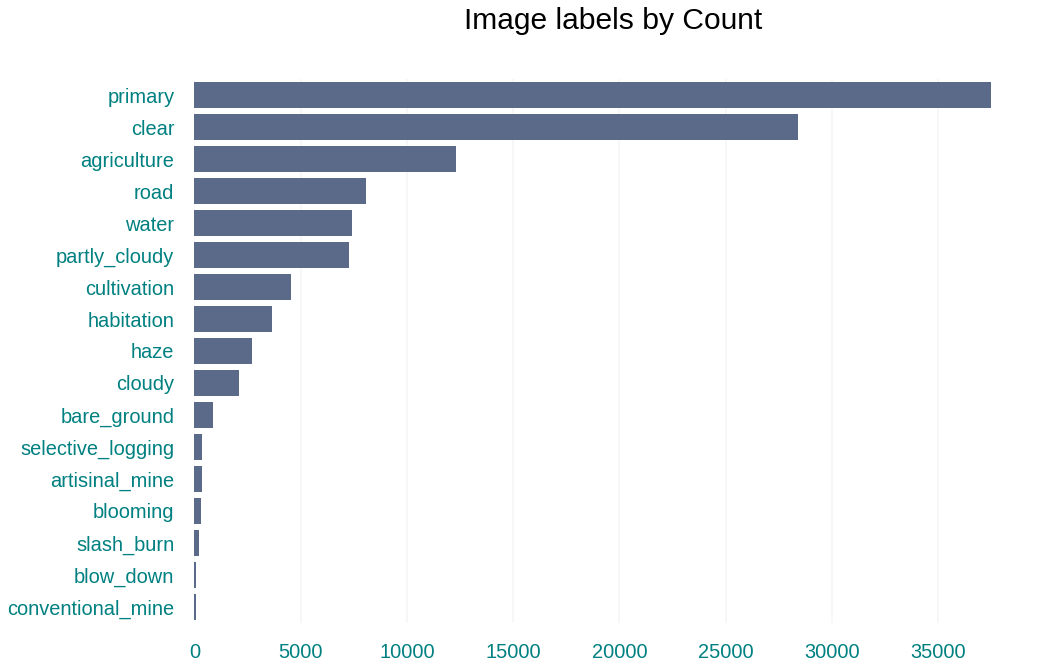

In [72]:
counts = defaultdict(int)
for label in labels:
    for sub_label in label:
        counts[sub_label] += 1
counts = {k: v for k, v in sorted(counts.items(), key=lambda item: item[1], reverse=True)}
y = list(counts.keys())
x = list(counts.values())

plt.style.use('seaborn-whitegrid')
fig, ax = plt.subplots(figsize=(15, 10))

ax.set_title('Image labels by Count', color='k', pad=50, fontsize=30)

ax.tick_params('x', colors='#008080', labelsize=20, pad=20)
ax.tick_params('y', colors='#008080', labelsize=20, pad=20)

for i in ['right', 'left', 'top', 'bottom']:
    ax.spines[i].set_visible(False)

plt.grid(True, color='gray', alpha=0.4, linewidth=0.3)
    
bar = sns.barplot(x, y, color='#54678f', ax=ax)

plt.ylabel('');
plt.xlabel('');

In [0]:
com = np.zeros([len(counts)]*2)
for i, l in enumerate(list(counts.keys())):
    for i2, l2 in enumerate(list(counts.keys())):
        c, cy = 0, 0
        for row in labels.values:
            if l in row:
                c += 1
                if l2 in row: cy += 1
        com[i, i2] = cy / c

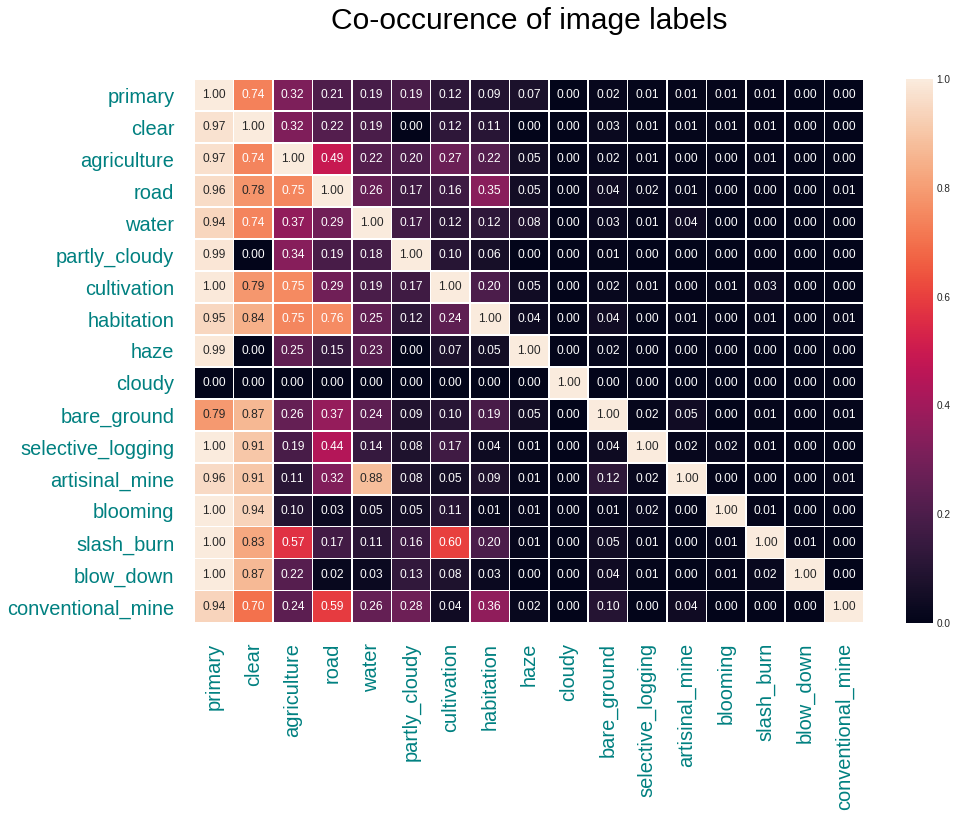

In [74]:
fig, ax = plt.subplots(figsize=(15, 10))
ax.set_title('Co-occurence of image labels', color='k', pad=50, fontsize=30)
ax.tick_params('x', colors='#008080', labelsize=20, pad=20)
ax.tick_params('y', colors='#008080', labelsize=20, pad=20)

sns.heatmap(com, annot=True, fmt='.2f', xticklabels=counts.keys(), yticklabels=counts.keys(), 
            linewidths=.5, ax=ax, annot_kws={'fontsize': 12})

This co-occurence matrix shows what percentage of the X label also has the Y label. This shows more information than the standard symmetrical matrix.

We can see that the label "primary" has the highest proportion of labels

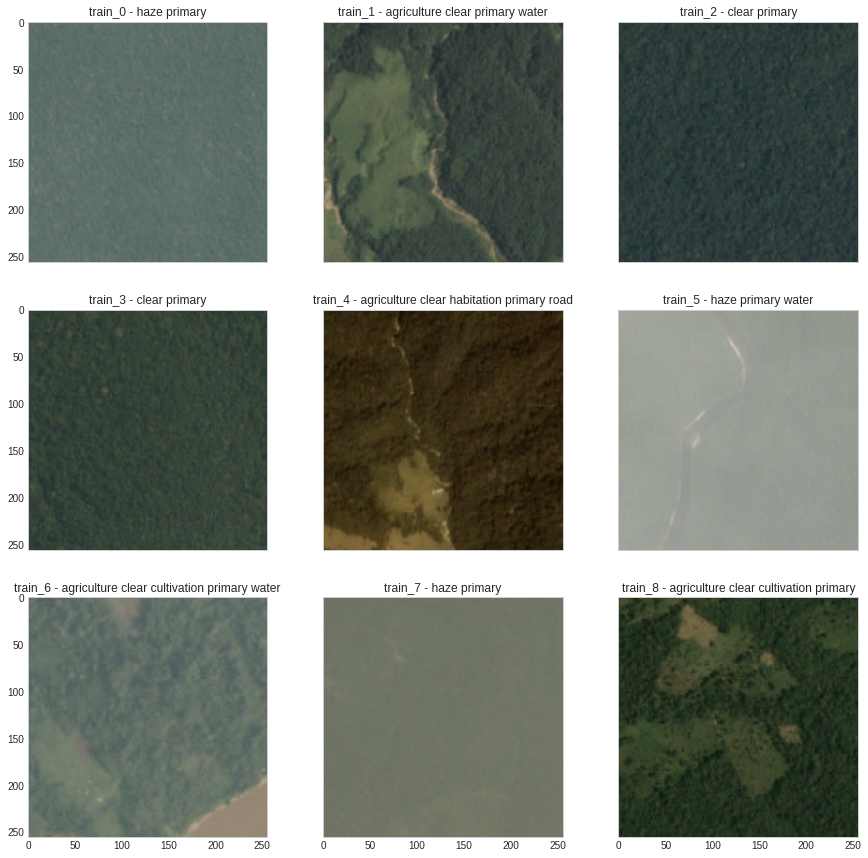

In [75]:
import cv2

new_style = {'grid': False}
plt.rc('axes', **new_style)
_, ax = plt.subplots(3, 3, sharex='col', sharey='row', figsize=(15, 15))
i = 0
for f, l in df_train[:9].values:
    img = cv2.imread('data/train/{}.jpg'.format(f))
    ax[i // 3, i % 3].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    ax[i // 3, i % 3].set_title('{} - {}'.format(f, l))
    i += 1
    
plt.show()
